## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expectes a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects.
3. Use your trained model to detect facial keypoints on the image.

---

## The complete the pipeline

Your complete facial keypoints detector should perform the following steps

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the faces contained in the image.
4. Convert these faces into appropriately sized Tensors to give to your trained model.
5. Predict the facial keypoints in these Tensors using your trained CNN.
6. Display the facial keypoints on each face.

**Note**: step 4 can be the trickiest because remember your convolutional network is only trained to detect facial keypoints in square, grayscale images where each pixel was normalized to lie in the interval `[0,1]`, and remember that each keypoint was also normalized during training to the interval `[-1,1]`.  This means that you need to perform this same pre-processing on your candidate face before you can give it to your trained model.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


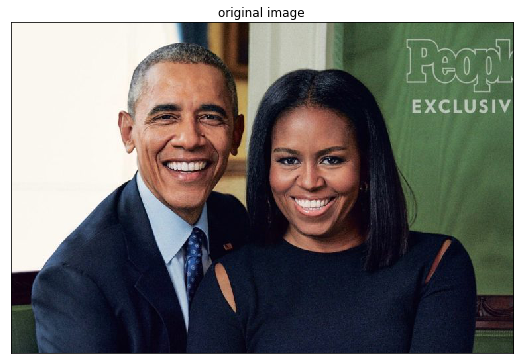

In [2]:
import cv2
# load in color image for face detection
img = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('original image')
ax1.imshow(img)

## Loading in a trained model

Once you have an image to work with (and you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your keypoint detection model.

Next, we load your best model by name.

In [2]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model (by your path name)
#net = torch.load('saved_models/keypoints_model_1.pt')

In [ ]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')


## Keypoint detection

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

You'll then use these face detections to crop the original image, isolate any faces, and transform those faces in Tensors that your model can accept as input images. Then, similar to how we applied this network to test data in Notebook 2, you'll apply your model to each image of a face, predict the facial keypoints, then display those keypoints on each face.

In [ ]:
from torch.autograd import Variable

# load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector - the output here is an array of detections --> more specifically the corners of each detection box
faces = face_cascade.detectMultiScale(img, 1.2, 6)

# loop over our detections and draw their corresponding boxes on top of our original image
img_with_detections = img.copy()    # make a copy of the original image to plot rectangle detections ontop of

# grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


## TODO: loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # mark the image with detected face
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),2)
    
    # grab detected face
    roi = gray[y:y+h, x:x+w]

    ## TODO: make facial point prediction using your trained network 
    ## Resize and normalize the face
    # wrap each face in a Variable and perform a forward pass to get the predicted facial keypoints
    normal_size = 224
    resize_face = cv2.resize(roi, (normal_size,normal_size))
    normal_face = resize_face / 255
    predictions = net.forward(normal_face)

    ## TODO: Display the face and the predicted keypoints
    x_points = predictions[:2]*w/2 + w/2 + x
    y_points = predictions[1::2]*h/2 + h/2 + y
    fig = plt.figure((9,9))
    ax1 = fig.add_subplot(111)
    ax1.scatter(x_points, y_points, marker='o', c='c', s=40)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title("Labelled Facial Keypoints")
    ax1.imshow(img_with_detections)
    
        
